In [1]:
import pandas as pd

# Load the datasets
postcode_electricity_df = pd.read_csv('Postcode_level_economy_7_electricity_2022.csv', encoding='ascii')
census_postcode_df = pd.read_csv('Census Postcode_Estimates_Table.csv', encoding='ascii')

# Display the first few rows of each dataframe to understand their structure
postcode_electricity_df.head()
census_postcode_df.head()

,Postcode,Total,Males,Females,Occupied_Households
0,AL1 1AG,14,6,8,6
1,AL1 1AJ,124,60,64,51
2,AL1 1AR,32,17,15,17
3,AL1 1AS,34,17,17,13
4,AL1 1BH,52,15,37,41


In [2]:
# Merge the datasets on the 'Postcode' column
merged_df = pd.merge(postcode_electricity_df, census_postcode_df, on='Postcode', how='inner')

# Display the first few rows of the merged dataframe
merged_df.head()
#merged_df.shape

,Outcode,Postcode,Num_meters,Total_cons_kwh,Mean_cons_kwh,Median_cons_kwh,Total,Males,Females,Occupied_Households
0,AL1,AL1 1BH,46,281294.98,6115.108261,5902.8,52,15,37,41
1,AL1,AL1 1BZ,7,29805.40,4257.914286,4979.2,18,11,7,12
2,AL1,AL1 1DU,5,34775.10,6955.020000,4940.3,81,45,36,27
3,AL1,AL1 1JJ,6,43955.90,7325.983333,4194.3,71,33,38,22
4,AL1,AL1 1JQ,8,35806.40,4475.800000,4013.0,50,31,19,22


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Descriptive Statistics
summary_stats = merged_df.describe()
summary_stats

correlation_matrix = merged_df.select_dtypes(include=[np.number]).corr()
correlation_matrix

,Num_meters,Total_cons_kwh,Mean_cons_kwh,Median_cons_kwh,Total,Males,Females,Occupied_Households
Num_meters,1.000000,0.875312,0.086648,0.133801,0.202546,0.208776,0.186908,0.414466
Total_cons_kwh,0.875312,1.000000,0.459990,0.453961,0.108625,0.115602,0.096663,0.269743
Mean_cons_kwh,0.086648,0.459990,1.000000,0.833281,-0.147252,-0.139506,-0.147951,-0.166681
Median_cons_kwh,0.133801,0.453961,0.833281,1.000000,-0.147516,-0.142577,-0.145443,-0.158615
Total,0.202546,0.108625,-0.147252,-0.147516,1.000000,0.975906,0.976720,0.858035
Males,0.208776,0.115602,-0.139506,-0.142577,0.975906,1.000000,0.906381,0.845638
Females,0.186908,0.096663,-0.147951,-0.145443,0.976720,0.906381,1.000000,0.829922
Occupied_Households,0.414466,0.269743,-0.166681,-0.158615,0.858035,0.845638,0.829922,1.000000


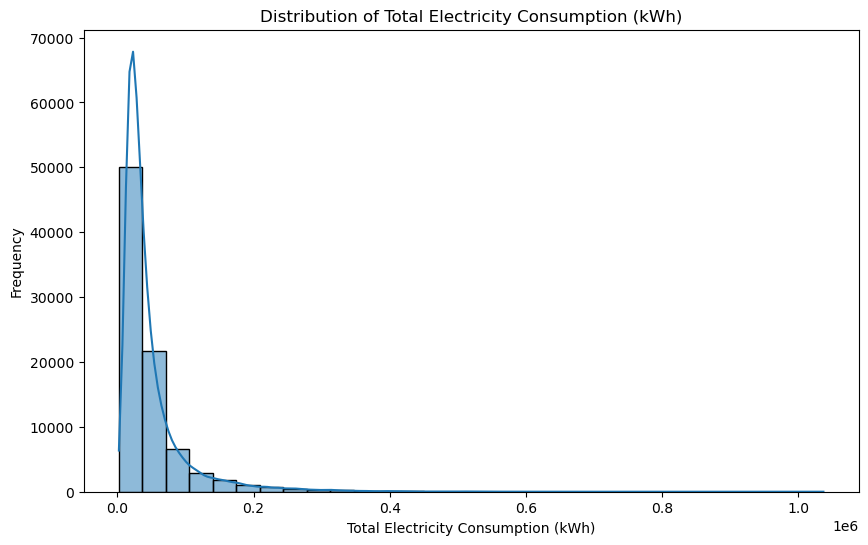

In [4]:
# Visualization: Distribution of Electricity Consumption
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Total_cons_kwh'], bins=30, kde=True)
plt.title('Distribution of Total Electricity Consumption (kWh)')
plt.xlabel('Total Electricity Consumption (kWh)')
plt.ylabel('Frequency')
plt.show()

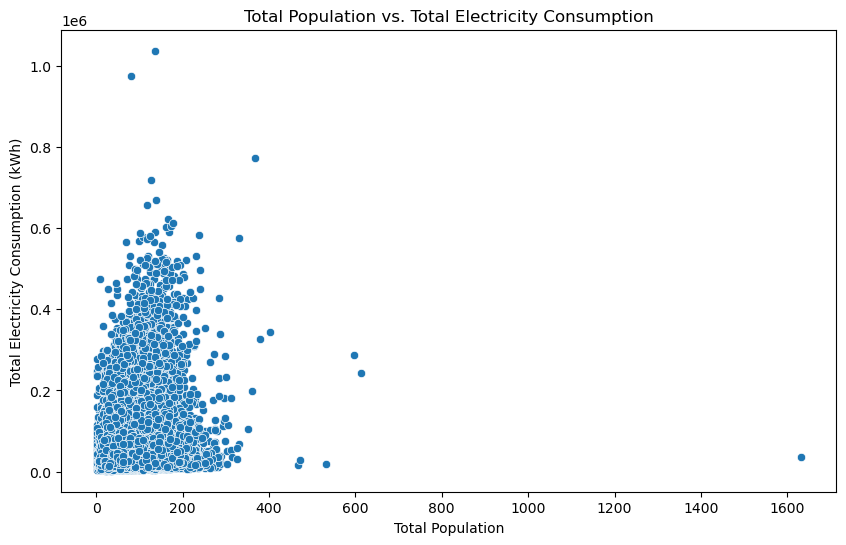

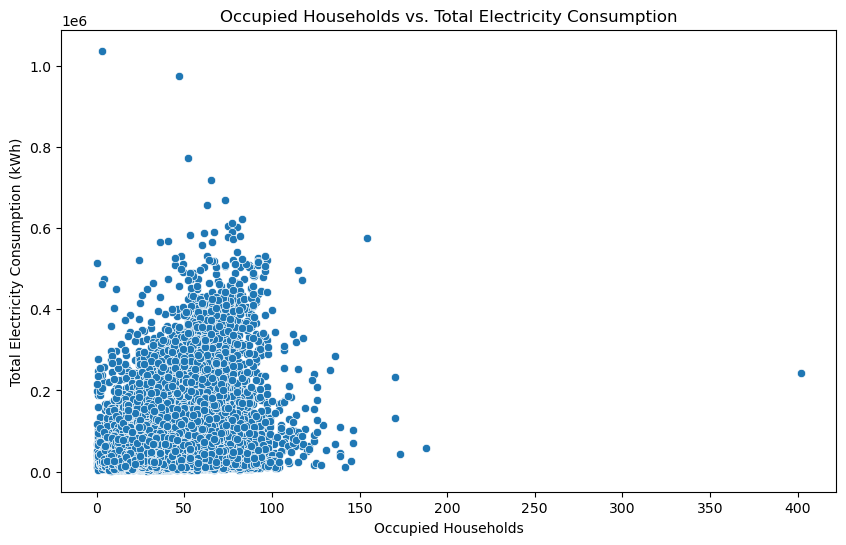

In [5]:
# Visualization: Relationship between Electricity Consumption and Demographic Variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total', y='Total_cons_kwh', data=merged_df)
plt.title('Total Population vs. Total Electricity Consumption')
plt.xlabel('Total Population')
plt.ylabel('Total Electricity Consumption (kWh)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Occupied_Households', y='Total_cons_kwh', data=merged_df)
plt.title('Occupied Households vs. Total Electricity Consumption')
plt.xlabel('Occupied Households')
plt.ylabel('Total Electricity Consumption (kWh)')
plt.show()

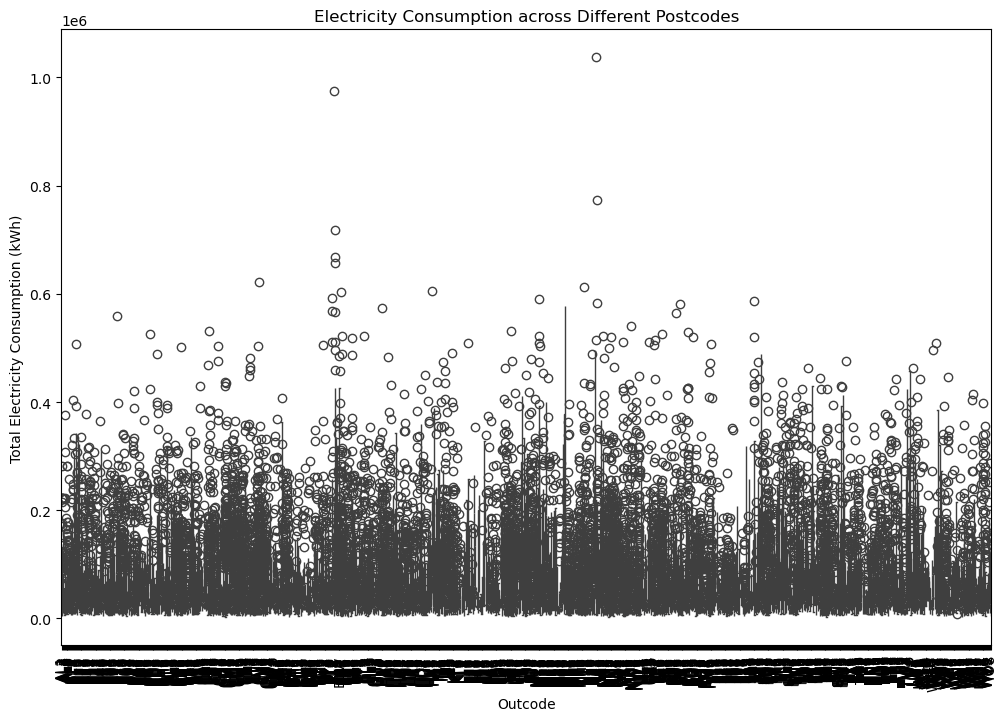

In [6]:
merged_df['Outcode'] = merged_df['Outcode'].astype(str)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Outcode', y='Total_cons_kwh', data=merged_df)
plt.title('Electricity Consumption across Different Postcodes')
plt.xlabel('Outcode')
plt.ylabel('Total Electricity Consumption (kWh)')
plt.xticks(rotation=90)
plt.show()

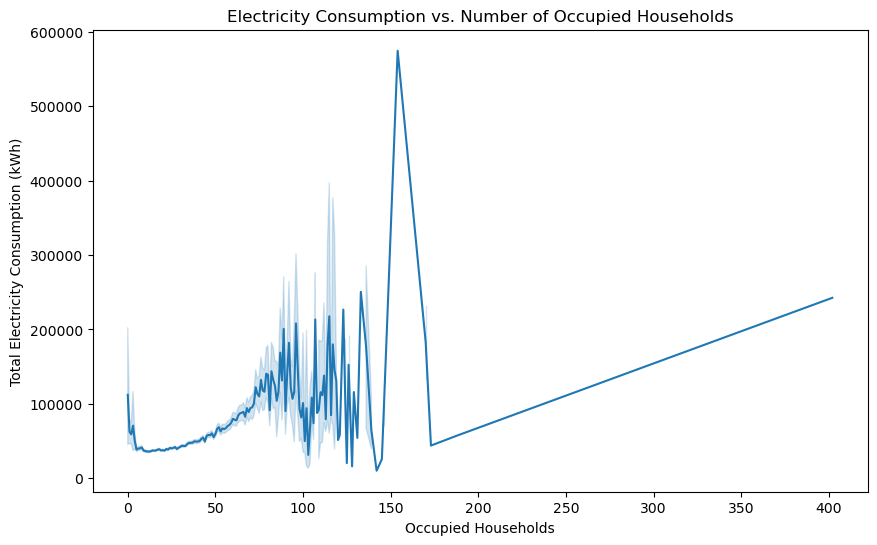

In [7]:
# Trend Analysis: Electricity Consumption vs. Number of Occupied Households
plt.figure(figsize=(10, 6))
sns.lineplot(x='Occupied_Households', y='Total_cons_kwh', data=merged_df)
plt.title('Electricity Consumption vs. Number of Occupied Households')
plt.xlabel('Occupied Households')
plt.ylabel('Total Electricity Consumption (kWh)')
plt.show()

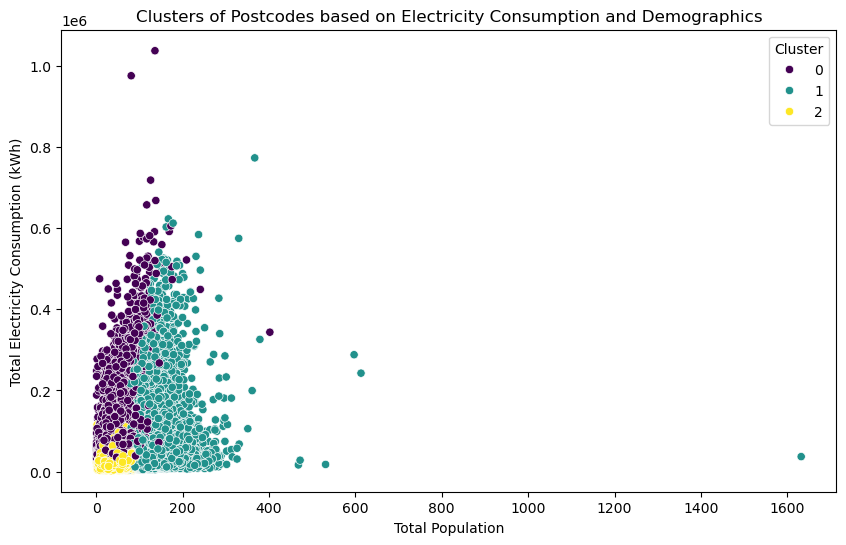

In [8]:
# Cluster Analysis: Grouping Postcodes with Similar Patterns
from sklearn.cluster import KMeans

# Selecting relevant features for clustering
features = merged_df[['Total_cons_kwh', 'Mean_cons_kwh', 'Median_cons_kwh', 'Total', 'Males', 'Females', 'Occupied_Households']]

# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
merged_df['Cluster'] = clusters

# Visualization: Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total', y='Total_cons_kwh', hue='Cluster', data=merged_df, palette='viridis')
plt.title('Clusters of Postcodes based on Electricity Consumption and Demographics')
plt.xlabel('Total Population')
plt.ylabel('Total Electricity Consumption (kWh)')
plt.show()

In [9]:
# Regression Analysis: Predicting Electricity Consumption
import statsmodels.api as sm

# Defining the independent variables (demographic factors) and dependent variable (electricity consumption)
X = merged_df[['Total', 'Males', 'Females', 'Occupied_Households']]
y = merged_df['Total_cons_kwh']

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Building the regression model
model = sm.OLS(y, X).fit()

# Summary of the regression model
regression_summary = model.summary()
print(regression_summary)

                            OLS Regression Results                            
Dep. Variable:         Total_cons_kwh   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     4287.
Date:                Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:47:32   Log-Likelihood:            -1.0475e+06
No. Observations:               85846   AIC:                         2.095e+06
Df Residuals:                   85842   BIC:                         2.095e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.267e+04    

In [10]:
# Calculate Electricity Consumption per Household
merged_df['Electricity_Consumption_per_Household'] = merged_df['Total_cons_kwh'] / merged_df['Occupied_Households']

# Calculate Population Density
merged_df['Population_Density'] = merged_df['Total'] / merged_df['Occupied_Households']

# Calculate Energy Efficiency (Mean and Median Consumption per Household)
merged_df['Energy_Efficiency'] = merged_df['Electricity_Consumption_per_Household'] / merged_df['Population_Density']

In [11]:
merged_df.head()

,Outcode,Postcode,Num_meters,Total_cons_kwh,Mean_cons_kwh,Median_cons_kwh,Total,Males,Females,Occupied_Households,Cluster,Electricity_Consumption_per_Household,Population_Density,Energy_Efficiency
0,AL1,AL1 1BH,46,281294.98,6115.108261,5902.8,52,15,37,41,0,6860.853171,1.268293,5409.518846
1,AL1,AL1 1BZ,7,29805.40,4257.914286,4979.2,18,11,7,12,2,2483.783333,1.500000,1655.855556
2,AL1,AL1 1DU,5,34775.10,6955.020000,4940.3,81,45,36,27,0,1287.966667,3.000000,429.322222
3,AL1,AL1 1JJ,6,43955.90,7325.983333,4194.3,71,33,38,22,0,1997.995455,3.227273,619.097183
4,AL1,AL1 1JQ,8,35806.40,4475.800000,4013.0,50,31,19,22,2,1627.563636,2.272727,716.128000


In [12]:
merged_df.tail()

,Outcode,Postcode,Num_meters,Total_cons_kwh,Mean_cons_kwh,Median_cons_kwh,Total,Males,Females,Occupied_Households,Cluster,Electricity_Consumption_per_Household,Population_Density,Energy_Efficiency
85841,YO8,YO8 9PS,10,47844.8,4784.4800,1803.7,186,97,89,78,1,613.394872,2.384615,257.230108
85842,YO8,YO8 9QA,8,50531.1,6316.3875,6300.2,100,53,47,45,1,1122.913333,2.222222,505.311000
85843,YO8,YO8 9QL,5,22834.8,4566.9600,1482.0,61,35,26,33,2,691.963636,1.848485,374.340984
85844,YO8,YO8 9RZ,7,10268.3,1466.9000,948.2,120,60,60,48,1,213.922917,2.500000,85.569167
85845,YO8,YO8 9ST,20,110555.4,5527.7700,4922.7,33,15,18,24,0,4606.475000,1.375000,3350.163636


In [13]:
merged_df.to_csv('new_data.csv', index = True)

Text(0, 0.5, 'Frequency')

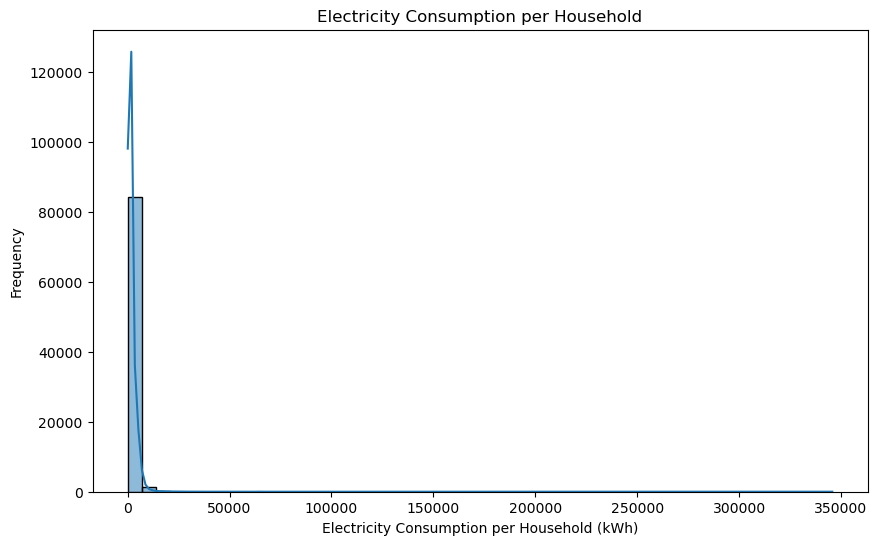

In [14]:
# Plotting
plt.figure(figsize=(10, 6))

# Electricity Consumption per Household

sns.histplot(merged_df['Electricity_Consumption_per_Household'], bins=50, kde=True)
plt.title('Electricity Consumption per Household')
plt.xlabel('Electricity Consumption per Household (kWh)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

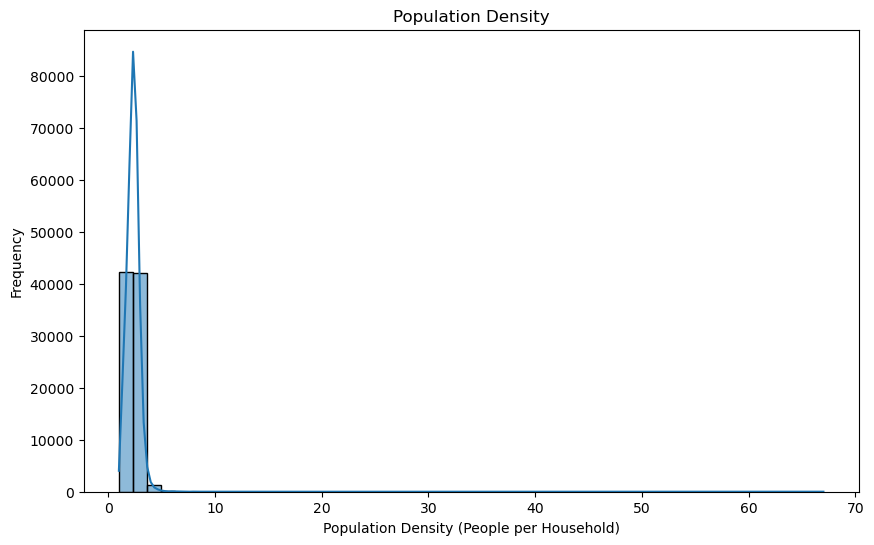

In [17]:
# Population Density
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Population_Density'], bins=50, kde=True)
plt.title('Population Density')
plt.xlabel('Population Density (People per Household)')
plt.ylabel('Frequency')

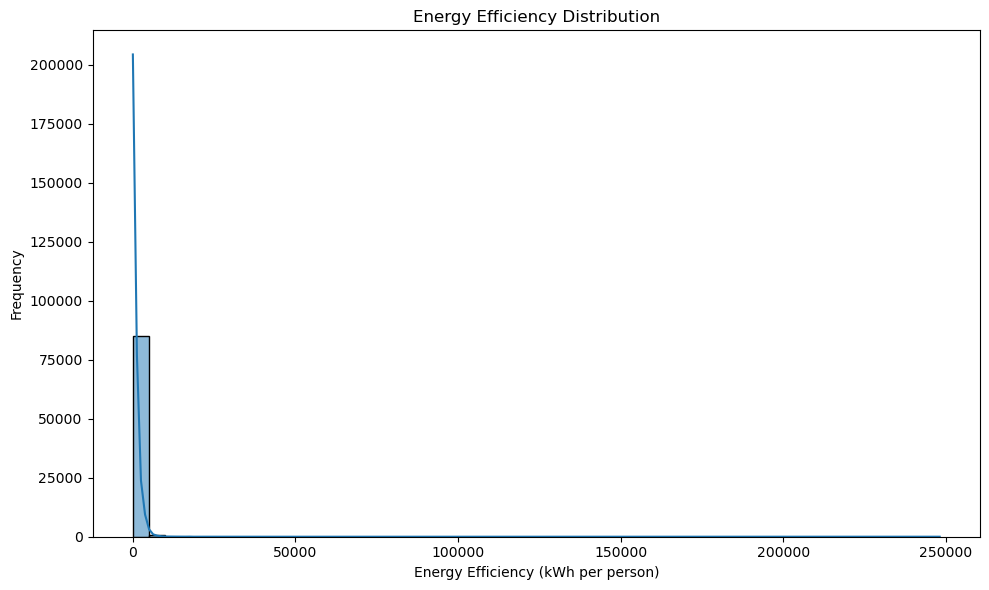

In [18]:
plt.figure(figsize=(10, 6))

# Energy Efficiency
sns.histplot(merged_df['Energy_Efficiency'], bins=50, kde=True)
plt.title('Energy Efficiency Distribution')
plt.xlabel('Energy Efficiency (kWh per person)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()